In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data = np.array(data)
m, n = data.shape

# TODO: Change shuffle
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:] / 0xFF

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:] / 0xFF

In [25]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) # error
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, np.max(Y) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    acc = []
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            acc.append(get_accuracy(get_predictions(A2), Y))
            print("Iteration: ", i)
            print("Accuracy: ", acc[-1])
    return W1, b1, W2, b2, acc

In [26]:
W1, b1, W2, b2, acc = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
Accuracy:  0.07412195121951219
Iteration:  50
Accuracy:  0.28192682926829266
Iteration:  100
Accuracy:  0.5498536585365854
Iteration:  150
Accuracy:  0.668829268292683
Iteration:  200
Accuracy:  0.7275609756097561
Iteration:  250
Accuracy:  0.7639024390243903
Iteration:  300
Accuracy:  0.7901951219512195
Iteration:  350
Accuracy:  0.8080731707317074
Iteration:  400
Accuracy:  0.8226097560975609
Iteration:  450
Accuracy:  0.8346585365853658


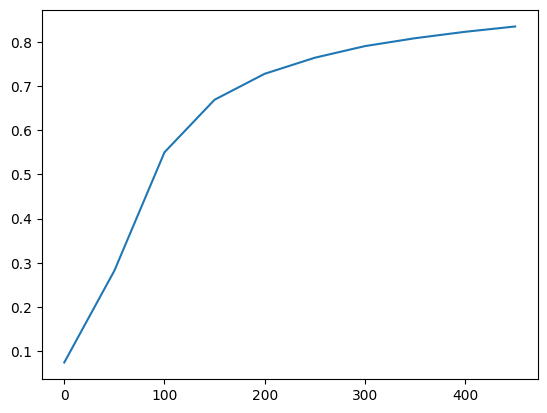

In [27]:
plt.plot(50 * np.arange(len(acc)), acc)